In [1]:
import numpy as np
print(f"numpy version: {np.__version__}")
import pandas as pd
print(f"pandas version: {pd.__version__}")
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
print(f"sklearn version: {pd.__version__}")
#to create a fair comparison
from sklearn.model_selection import train_test_split

numpy version: 1.22.3
pandas version: 1.4.3
sklearn version: 1.4.3


# Diabetes Dataset Linear Regression

In [2]:
from sklearn.datasets import load_diabetes
diabetes_dataset = load_diabetes()
diabetes_dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

#### sklearn returns dictionary-like object, with the following attributes:
data: - The data matrix. 

target: - The classification target.

feature_names: - The names of the dataset columns.

frame: - Only present when as_frame=True. DataFrame with data and target.

In [7]:
# The full description of the dataset
print(diabetes_dataset["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [8]:
# add diabetes_dataset to the pandas df
df = pd.DataFrame(diabetes_dataset.data, columns = diabetes_dataset.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [9]:
diabetes_dataset.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [14]:
# add Classes of the wine dataset 
df['target'] = diabetes_dataset.target
df.head(2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0


In [15]:
#check if the df was loaded correctly and check the types of the columns
print(df.shape)
print(df.dtypes)

(442, 11)
age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object


In [16]:
#check if the df has some missing values
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

<AxesSubplot:>

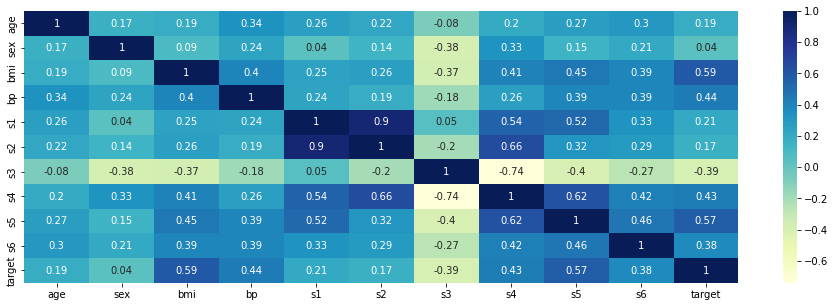

In [23]:
# create a correlation matrix that measures the linear relationships between the variables
correlation_matrix = df.corr().round(2)
# plot using seaborn lib
plt.figure(figsize = (16,5))
sns.heatmap(data=correlation_matrix, annot=True, cmap="YlGnBu") # annot = True to print the values inside the square

In [19]:
df.head(2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0


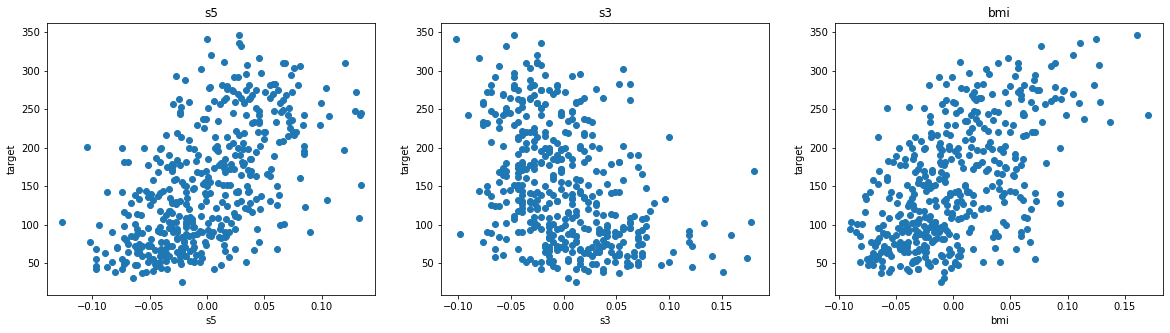

In [48]:
#plot a scatter plot to see how features vary with target
plt.figure(figsize=(20, 5))

features = ['s5', 's3', 'bmi']
target = df['target']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('target')

In [49]:
#use s5 and s3 and bmi as features fort the target

### Munge and split the data for training and testing

Preparing the data for training the model, let's first try to use all features and then select the features that gives the largest difference beetween classes, like: flavanoids.

We will add features in an array X and the classes labels in a corresponding array y.

In [50]:
# get all features
X = pd.DataFrame(np.c_[df['s5'], df['s3'], df['bmi']], columns = ['s5','s3', 'bmi'])
# X = df.iloc[:, :-1]
X.head(2)

,s5,s3,bmi
0,0.019907,-0.043401,0.061696
1,-0.068332,0.074412,-0.051474


In [51]:
# get labels
y = df['target']

In [52]:
print(X.shape)
print(y.shape)

(442, 3)
(442,)


In [150]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True,
                                                   test_size = 0.10,
                                                   random_state = 20230201)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(397, 3)
(397,)
(45, 3)
(45,)


# Training and testing the linear regresion

In [151]:
# lets us take some LinearRegression
from sklearn import linear_model

model = linear_model.LinearRegression()
model = model.fit(X_train,y_train)

#### Model evaluation 

##### check on the training set 

In [152]:
# how well is our prediction using the mean squared error (MSE) method, give us an expectation value
from sklearn.metrics import mean_squared_error

# check on the training set
y_train_predict = model.predict(X_train)
score = mean_squared_error(y_train, y_train_predict)
print('Score is {}'.format(score))

Score is 3128.029216864141


In [153]:
rmse = (np.sqrt(score))
print('RMSE is {}'.format(rmse))

RMSE is 55.92878701406048


In [154]:
# additionally R2-score to evaluate the prediction, is a goodness-of-fit measure for linear regression models
from sklearn.metrics import r2_score

r2 = r2_score(y_train, y_train_predict)
print('R2 score is {}'.format(r2))

R2 score is 0.4759489861192585


##### check on the testing set  

In [155]:
# testing set
y_test_predict = model.predict(X_test)
score = mean_squared_error(y_test, y_test_predict)
print('Score is {}'.format(score))

rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

Score is 3304.521477404403
RMSE is 57.48496740369958
R2 score is 0.4082441180629667


In [156]:
model.score(X_test, y_test)

0.4082441180629667

####  Plot the result 

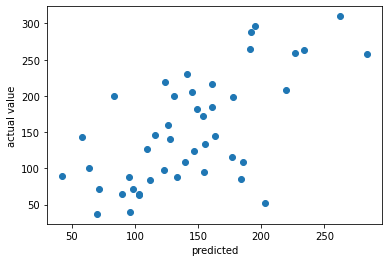

In [157]:
# plotting the y_pred vs y_test
# ideally should have been a straight line, but not so wide
plt.scatter( y_test_predict, y_test)
plt.ylabel('actual value')
plt.xlabel('predicted')

plt.show()

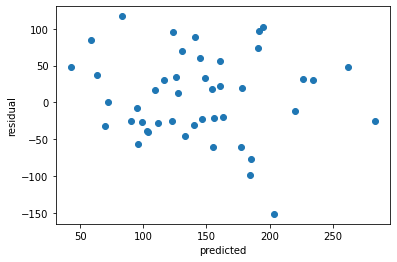

In [158]:
# plotting the residuals y_test-y_pred
residual = y_test - y_test_predict
plt.scatter( y_test_predict, residual)
plt.ylabel('residual')
plt.xlabel('predicted')

plt.show()

#### Change the amount of trained and test sample

In [159]:
#split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, shuffle=True, 
                                                   test_size = 0.25,
                                                   random_state = 20230201)

print(X1_train.shape)
print(y1_train.shape)

print(X1_test.shape)
print(y1_test.shape)

(331, 3)
(331,)
(111, 3)
(111,)


In [160]:
model1 = linear_model.LinearRegression()
model1 = model.fit(X1_train, y1_train)

In [161]:
model1.score(X1_test, y1_test)

0.4546970293992366

In [162]:
# testing set
y1_test_predict = model1.predict(X1_test)
rmse = (np.sqrt(mean_squared_error(y1_test, y1_test_predict)))
r2 = r2_score(y1_test, y1_test_predict)

print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

RMSE is 55.13253875219699
R2 score is 0.4546970293992366


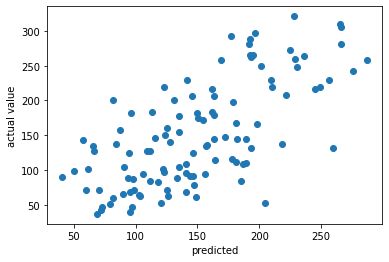

In [163]:
# plotting the y_pred vs y_test
# ideally should have been a straight line
plt.scatter( y1_test_predict, y1_test)
plt.ylabel('actual value')
plt.xlabel('predicted')

plt.show()

Q&A: the prediction is not so good, we see that we need more data to learn.
But in general, the higher the R-squared, the better the model fits our data.

The last score we got is ~0.45, this indicate that half of the dependent variable variance is explained by the model's independent variables